In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [15]:
class AgentState(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    operation1: str
    operation2: str
    final_result_1: int
    final_result_2: int

In [16]:
def add_node_1(state: AgentState) -> AgentState:
    state["final_result_1"] = state["num1"] + state["num2"]
    return state

def subtract_node_1(state: AgentState) -> AgentState:
    state["final_result_1"] = state["num1"] - state["num2"]
    return state

def add_node_2(state: AgentState) -> AgentState:
    state["final_result_2"] = state["num3"] + state["num4"]
    return state

def subtract_node_2(state: AgentState) -> AgentState:
    state["final_result_2"] = state["num3"] - state["num4"]
    return state

def decide_next_node_1(state: AgentState) -> AgentState:
    if state["operation1"] == "+":
        return "addition_operation_1"
    elif state["operation1"] == "-":
        return "subtraction_operation_1"
    
def decide_next_node_2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation_2"
    elif state["operation2"] == "-":
        return "subtraction_operation_2"

In [17]:
graph = StateGraph(AgentState)

graph.add_node("add_node_1", add_node_1)
graph.add_node("subtract_node_1", subtract_node_1)
graph.add_node("add_node_2", add_node_2)
graph.add_node("subtract_node_2", subtract_node_2)

graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node_1,
    {
        "addition_operation_1": "add_node_1",
        "subtraction_operation_1": "subtract_node_1"
    }
)
graph.add_edge("add_node_1", "router2")
graph.add_edge("subtract_node_1", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node_2,
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)
graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)

app = graph.compile()

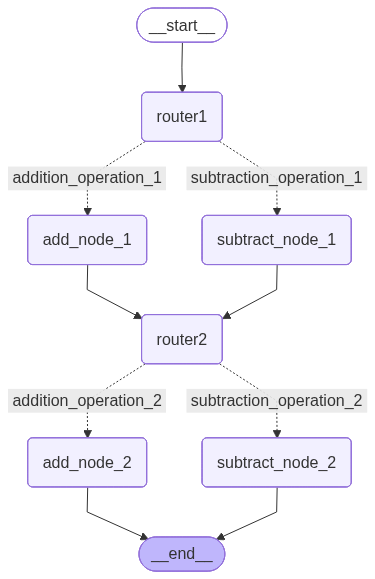

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
initial_state = AgentState(num1=10, num2=5, num3=20, num4=10, operation1="+", operation2="-")
result = app.invoke(initial_state)

In [21]:
print(result["final_result_1"])
print(result["final_result_2"])

15
10
